#  K- Means Clustering


# grip@spark fountation

In [4]:
#import all libraries 
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
#load the data set
iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
#check the data set for finding null valueas
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [13]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

.



DATA VISUALISATION




.

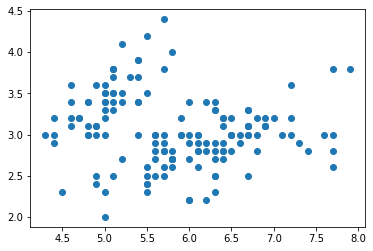

In [17]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [16]:
#assing the columns equal to "X"
x=df.iloc[:,:4]
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
#import k mean clustering for finding number
from sklearn.cluster import KMeans

In [147]:
#twss
#   max_iterint, default=300
              #   Maximum number of iterations of the k-means algorithm for a single run.
#   n_init, default=10
            #   Number of time the k-means algorithm will be run with different centroid seeds
#    intt----- Method for initialization:
#    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

C:\Users\gegvf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1 Inertia 681.3705999999996
Cluster 2 Inertia 152.34795176035797
Cluster 3 Inertia 78.851441426146
Cluster 4 Inertia 57.22847321428572
Cluster 5 Inertia 46.47223015873018


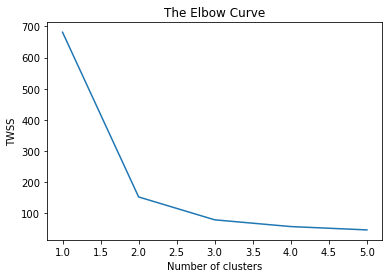

In [20]:
#TWSS stands for total within-cluster sum of square
twss = []
for i in range(1,6):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x)
 twss.append(kmeans.inertia_)
 print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,6),twss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('TWSS') 
plt.show()

In [ ]:
.


# from this graph, we will get the number of cluster =3


.

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_pred= kmeans.fit_predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [33]:
kmeans.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [35]:
df['output']=y_pred

In [36]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=2,n_jobs=4,random_state=23)

In [78]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

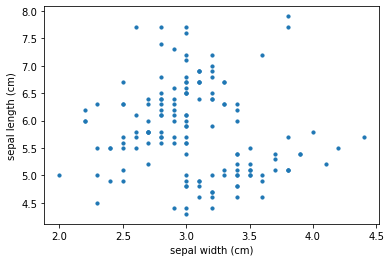

In [38]:
df.plot(y='sepal length (cm)',x='sepal width (cm)',kind='scatter',s=10)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

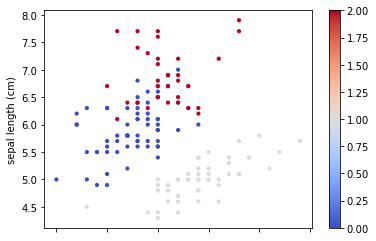

In [64]:
df.plot(y='sepal length (cm)',x='sepal width (cm)',c=kmeans.labels_,kind='scatter',s=10,cmap=plt.cm.coolwarm)


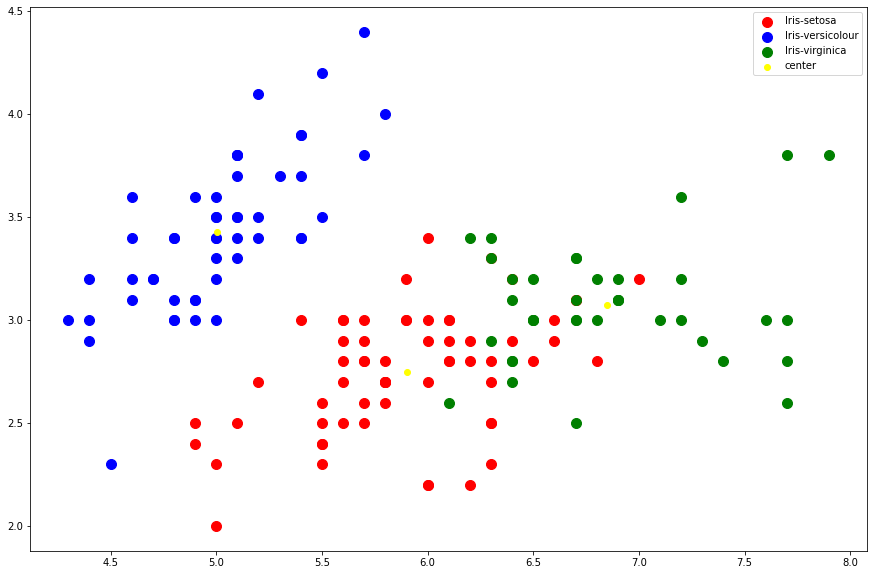

In [77]:
plt.figure(figsize=(15,10))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
#ploting cluster centers
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'yellow',label = 'center')
     
plt.legend()